In [ ]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.arima.model import ARIMA






In [19]:
bd_modificada = pd.read_excel("bd_modificada.xlsx") 
bd_sin_salinidad = bd_modificada.drop(columns=["Salinidad"])


c:\Users\harve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\harve\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

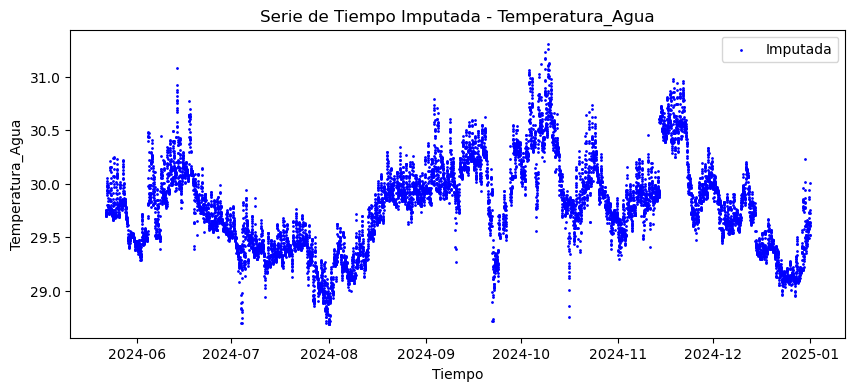

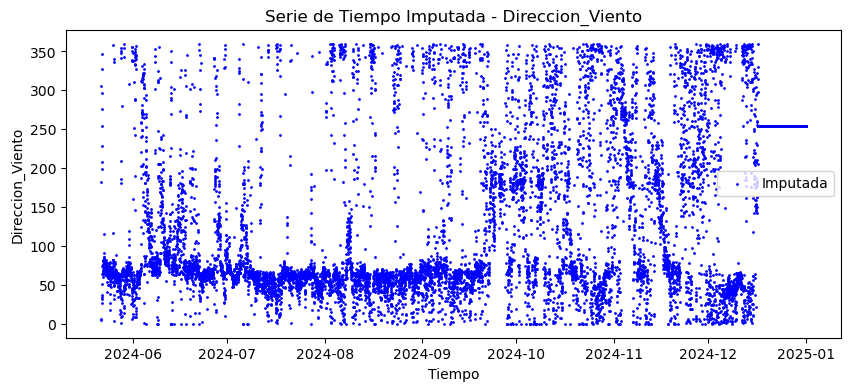

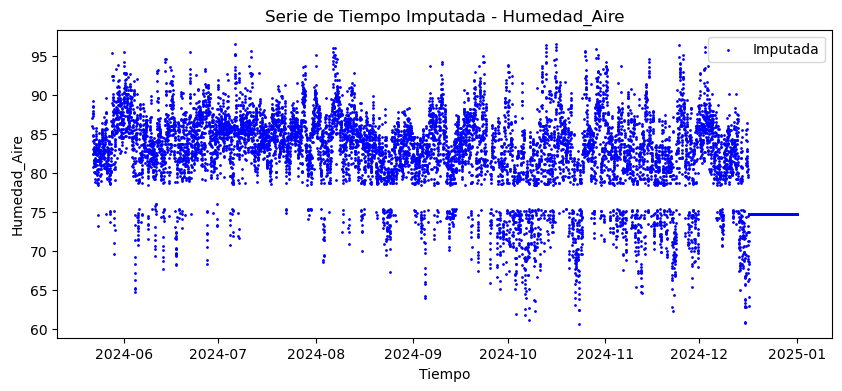

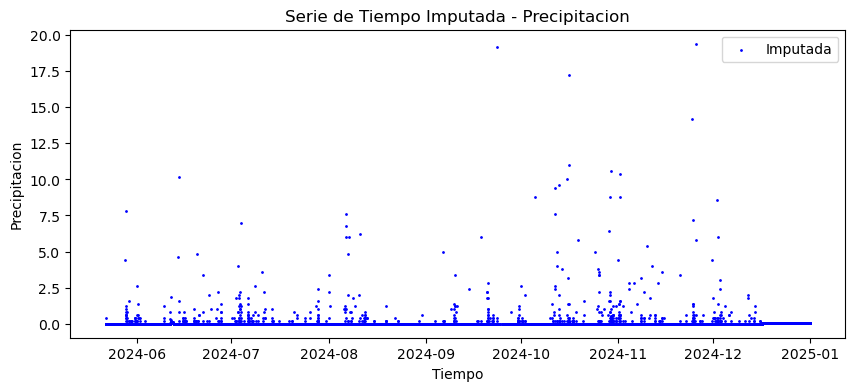

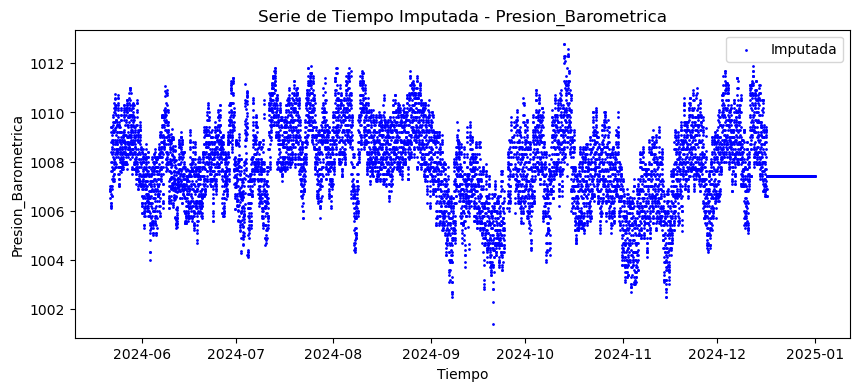

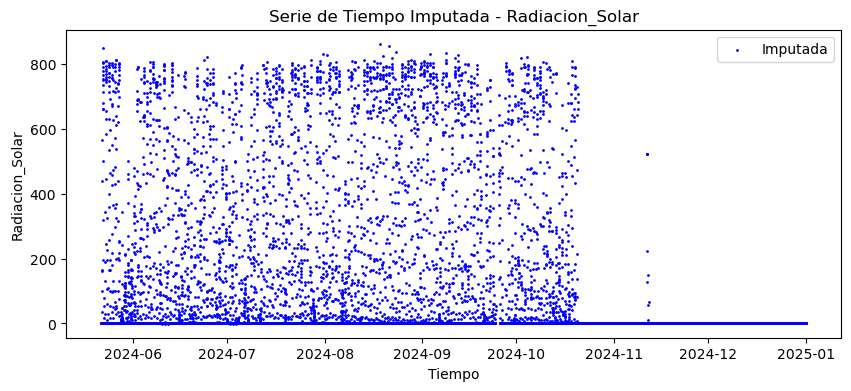

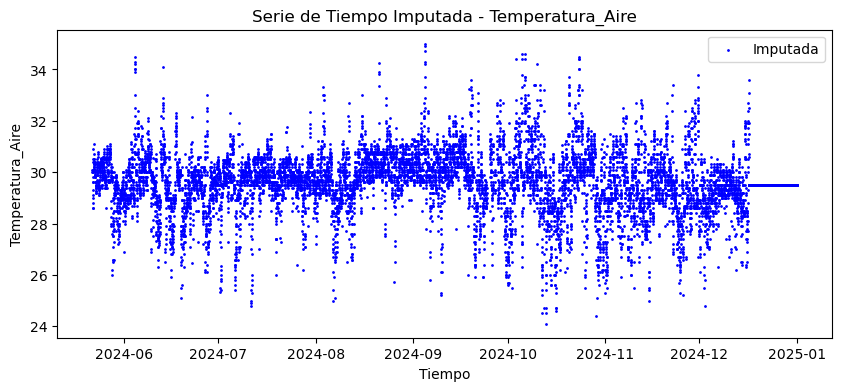

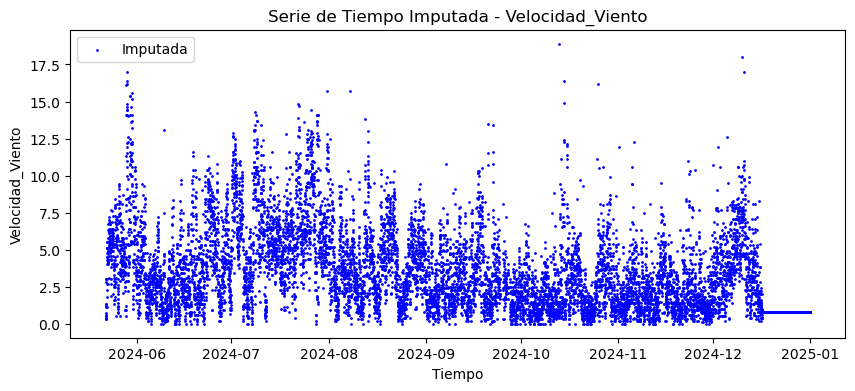

In [23]:


# Definir la variable de tiempo
tiempo = bd_sin_salinidad["Tiempo"]

# Crear un DataFrame para almacenar las series imputadas
bd_imputada = bd_sin_salinidad.copy()

# Imputación con ARIMA para cada variable excepto "Tiempo"
for col in bd_imputada.columns:
    if col != "Tiempo":
        # Extraer la serie de tiempo
        serie = bd_imputada[col]
        
        # Identificar los índices con valores NaN
        nan_indices = serie[serie.isna()].index

        if nan_indices.any():
            # Ajustar modelo ARIMA
            serie_sin_nan = serie.dropna()
            modelo = sm.tsa.ARIMA(serie_sin_nan, order=(1,1,1))  # Orden (p,d,q) básico
            resultado = modelo.fit()

            # Predecir valores faltantes
            predicciones = resultado.predict(start=nan_indices[0], end=nan_indices[-1])

            # Rellenar valores imputados en la serie
            bd_imputada.loc[nan_indices, col] = predicciones

# Graficar las series imputadas en función del tiempo
for col in bd_imputada.columns:
    if col != "Tiempo":
        plt.figure(figsize=(10, 4))
        plt.scatter(tiempo, bd_imputada[col], color="blue", s=1,label="Imputada")
        plt.xlabel("Tiempo")
        plt.ylabel(col)
        plt.title(f"Serie de Tiempo Imputada - {col}")
        plt.legend()
        plt.show()


